In [1]:
pwd

'/mnt/md0/isshamie/Projects/Mito_Trace/workflow/notebooks/clone_af_dendrograms'

In [2]:

# INDIR = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/"
# OUTDIR = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/barcodes/btwnClones_dendro_dt_0.6/"
# DONOR = 0
# dendroThresh=0.6

#clones_meta = '/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/results/clones_summary/feb23_2022/clones_summary.csv'
#clones_indir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/"
#clone_sizes_in_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/clone_counts/minCellConds_1/clone_sizes.csv"
INDIR = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/clones/variants_init/knn/kparam_30/"
AF_INDIR = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/clones/variants_init/knn/kparam_30/donor0/"

OUTDIR = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/clones/variants_init/knn/kparam_30/barcodes/btwnClones_dendro_dynamic"
DONOR = 0


# INDIR = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30"
# OUTDIR = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/barcodes/btwnClones_dendro_dt_0.6"
# DONOR = 1
#dendroThresh = 0.6

verbose=False

mt_ref="/data/Mito_Trace/data/processed/genomes/mtMasked/GRCh38_MT_blacklist_A2_2020/chrM.fasta"

In [3]:
import src.utils.variant_utils as vu
import src.utils.dendro_clust as dc

import mplh.cluster_help as ch
import mplh.fig_utils as fu

from os.path import join, exists, dirname
from glob import glob
import pickle
import os
import vireoSNP
import numpy as np
from scipy import sparse
from scipy.io import mmread
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
print(vireoSNP.__version__)
import pandas as pd
import seaborn as sns
from vireoSNP import Vireo
np.set_printoptions(formatter={'float': lambda x: format(x, '.5f')})
import scipy
from itertools import combinations
#from src.utils import utils  as ut

fig_utils from mplh
0.5.6


In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from src.utils.dendro_clust import run_dynamic

In [6]:
out_f = join(OUTDIR, f"donor{DONOR}")

### Load cells_meta 
### Create clones_meta - get number of cells in a clone and donor

In [7]:
cells_meta = pd.read_csv(join(INDIR, "cells_meta.tsv"), sep="\t", index_col=0)
cells_meta["lineage"] = cells_meta.apply(lambda x: f'{x["donor"]}_{x["lineage"]}', axis=1)
cells_meta

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,...,seurat_clusters,nCount_RNA,nFeature_RNA,ID,Row.names,lineage,donor,condition,name,cluster_labels
Flt3l_AAACGAACAAGCGAAC-1,Flt3l,2271,2271,8825,1544,24,24,535,1308,5390,...,5,3360,2784,AAACGAACAAGCGAAC-1_Flt3l,Flt3l_AAACGAACAAGCGAAC-1,0_8,0,Flt3l,0_8,5
Flt3l_AAACGAACACAGCCAC-1,Flt3l,2854,2854,10589,1294,41,31,456,2764,6003,...,9,3722,2998,AAACGAACACAGCCAC-1_Flt3l,Flt3l_AAACGAACACAGCCAC-1,0_27,0,Flt3l,0_27,9
Flt3l_AAACGAACACAGGTAG-1,Flt3l,615,615,2384,240,13,7,149,594,1381,...,3,901,865,AAACGAACACAGGTAG-1_Flt3l,Flt3l_AAACGAACACAGGTAG-1,0_8,0,Flt3l,0_8,3
Flt3l_AAACGAACATAGAATG-1,Flt3l,985,985,3395,433,8,20,163,985,1786,...,4,1090,1005,AAACGAACATAGAATG-1_Flt3l,Flt3l_AAACGAACATAGAATG-1,0_8,0,Flt3l,0_8,4
Flt3l_AAACGAAGTATTCGAC-1,Flt3l,894,894,4999,553,16,17,197,1650,2566,...,9,1385,1248,AAACGAAGTATTCGAC-1_Flt3l,Flt3l_AAACGAAGTATTCGAC-1,0_12,0,Flt3l,0_12,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Input_TTTGGCCGTATATGGA-1,Input,7710,7710,38155,13305,118,152,1558,10362,12660,...,2,8630,5610,TTTGGCCGTATATGGA-1_Input,Input_TTTGGCCGTATATGGA-1,1_17,1,Input,1_17,2
Input_TTTGGCCTCGGCTATA-1,Input,6260,6260,33678,10327,133,126,1222,9544,12326,...,7,8038,5343,TTTGGCCTCGGCTATA-1_Input,Input_TTTGGCCTCGGCTATA-1,1_14,1,Input,1_14,7
Input_TTTGTGTAGGTTGTTC-1,Input,3466,3466,28547,5288,99,92,593,16793,5682,...,5,3661,2933,TTTGTGTAGGTTGTTC-1_Input,Input_TTTGTGTAGGTTGTTC-1,1_2,1,Input,1_2,5
Input_TTTGTGTCAAGCCAGA-1,Input,2635,2635,19591,3883,37,67,496,10265,4843,...,2,2945,2326,TTTGTGTCAAGCCAGA-1_Input,Input_TTTGTGTCAAGCCAGA-1,1_27,1,Input,1_27,2


In [8]:
clones_meta_df = pd.DataFrame(cells_meta.groupby("lineage").size(), columns=["size"]) #, index=["size"])
clones_meta_df["donor"] = [x.split("_")[0] for x in clones_meta_df.index]
clones_meta_df["donor"] = clones_meta_df["donor"].astype(int)
clones_meta_df

,size,donor
lineage,,
0_0,805,0
0_1,412,0
0_12,237,0
0_13,225,0
0_14,177,0
0_15,184,0
0_16,178,0
0_17,150,0
0_18,139,0


In [9]:
curr_clones = clones_meta_df[clones_meta_df["donor"]==DONOR]
# cells_meta = pd.read_csv(join(INDIR, "cells_meta.tsv"), sep='\t')#.sort_values(["donor", "lineage"])
curr_labels = cells_meta[cells_meta["donor"]==DONOR]

In [10]:
# curr_clones = clones_meta_df[clones_meta_df["donor"]==DONOR].set_index("lineage")
# curr_clones

## Load AF and DP

In [11]:
af_indir = join(AF_INDIR) #, "sc_af", f"donor{DONOR}")
AF_df = pd.read_csv(join(af_indir, "af.tsv"), index_col=0, sep="\t").transpose()
DP_df = pd.read_csv(join(af_indir, "dp.tsv"), index_col=0, sep="\t").transpose()


### Functions to get mean and median

In [12]:
def calc_mean(cells, af):
    #print(cells.head())
    return af.loc[:,cells["ID"].values].mean(axis=1)

def calc_median(cells, af):
    #print(cells.head())
    return af.loc[:,cells["ID"].values].median(axis=1)

### Calculate clone-barcode mean

In [13]:
mean_af = curr_labels.groupby(["lineage"]).apply(calc_mean, af=AF_df)
anno = mean_af.reset_index()[["lineage"]]

# Remove clones that have all 0
# print('mean_af shape', mean_af.shape)
# mean_af = mean_af.loc[~((mean_af==0).all(axis=1))]
# curr_clones = curr_clones.loc[mean_af.index]
# print('mean_af shape after rm 0', mean_af.shape)

mean_dp = curr_labels.groupby(["lineage"]).apply(calc_mean, af=np.log2(DP_df+1))
mean_dp = mean_dp.loc[mean_af.index, mean_af.columns]

#mean_dp = mean_dp.reset_index(drop=True)
anno_dp = mean_dp.reset_index()[["lineage"]]
na_cells = curr_labels.loc[curr_labels["lineage"].isnull()]
na_mean_af = na_cells.groupby("condition").apply(calc_mean, af=AF_df)

if not (na_mean_af.shape[0] == 0):
    print('na shape', na_mean_af.shape)
    na_anno = pd.concat((anno,pd.DataFrame({"lineage":["None"]*len(na_mean_af.index)})), ignore_index=True)
    na_concat = pd.concat((mean_af.reset_index(drop=True), na_mean_af.reset_index(drop=True)), ignore_index=True)
    na_mean_dp = na_cells.groupby("condition").apply(calc_mean, af=np.log2(DP_df+1))
    na_dp_concat = pd.concat((mean_dp, na_mean_dp.reset_index(drop=True)), ignore_index=True)
else:
    na_anno = anno
    na_concat = mean_af.reset_index(drop=True)
    na_dp_concat = mean_dp
     
mean_af  

,10559G,11251G,11453A,11719A,11812G,13368A,14233G,14905A,152C,15452A,16294T,16296T,16304C,1888A,1949A,3109C,4117C,4917G,5147A,5581G
lineage,,,,,,,,,,,,,,,,,,,,
0_0,0.012174,0.013598,0.003104,0.012144,0.014766,0.008970,0.002838,0.010571,0.001166,0.002380,0.001491,0.000872,0.001127,0.003729,0.001142,0.002032,0.014538,0.007044,0.013050,0.922107
0_1,0.035689,0.005740,0.001675,0.021425,0.005440,0.005644,0.004422,0.005901,0.000088,0.004017,0.001168,0.000820,0.002245,0.004618,0.000411,0.002290,0.008774,0.004200,0.005142,0.004403
0_12,0.000606,0.000791,0.001168,0.000481,0.000131,0.001214,0.000116,0.000705,0.000422,0.000237,0.000000,0.000000,0.000603,0.000176,0.000216,0.000000,0.000294,0.001842,0.000633,0.989065
0_13,0.005112,0.007282,0.000837,0.004209,0.002965,0.006294,0.006391,0.004373,0.003041,0.004318,0.001876,0.001314,0.001668,0.004136,0.003965,0.005890,0.006600,0.004415,0.006110,0.179749
0_14,0.001701,0.001827,0.003000,0.000808,0.000878,0.001195,0.000815,0.000468,0.000083,0.000935,0.000121,0.000269,0.000112,0.000979,0.001533,0.001887,0.001172,0.002024,0.001398,0.658732
0_15,0.003094,0.001944,0.000134,0.004868,0.040803,0.040209,0.003703,0.039683,0.000198,0.001837,0.000815,0.000000,0.000725,0.001287,0.001117,0.000701,0.002475,0.003346,0.001822,0.003632
0_16,0.002057,0.001183,0.000511,0.002428,0.003290,0.001947,0.001636,0.002198,0.000000,0.000826,0.000194,0.000000,0.000697,0.002041,0.001887,0.050547,0.001399,0.002943,0.001436,0.946758
0_17,0.005341,0.005245,0.000693,0.014285,0.010402,0.011136,0.003970,0.005969,0.000000,0.007115,0.005313,0.005286,0.006055,0.003281,0.816990,0.010018,0.006646,0.007938,0.006943,0.034296
0_18,0.004901,0.007097,0.003454,0.007346,0.004302,0.009560,0.003439,0.004604,0.003048,0.002773,0.004427,0.004248,0.005007,0.004428,0.205963,0.003445,0.008946,0.000742,0.015078,0.810107


In [14]:
# Get variant types
variants_df = vu.add_ref_to_variants(variants=mean_af.columns.values,
                                     mt_df=vu.load_mt_ref(mt_ref))

variants_df = vu.type_of_variants(variants_df, to_preproc=False)

In [15]:
# mean_af.to_csv(out_f+".initInds.mean.csv")

# curr_clones[["donor","size", "log2_fold","-log10(fold p_adj)", "shuffle_sig", 
#              "ncells"]+ list(curr_labels["condition"].unique())].to_csv(out_f+".initInds.indsMeta.csv")

### Cluster to get dendro results

In [16]:
mean_af

,10559G,11251G,11453A,11719A,11812G,13368A,14233G,14905A,152C,15452A,16294T,16296T,16304C,1888A,1949A,3109C,4117C,4917G,5147A,5581G
lineage,,,,,,,,,,,,,,,,,,,,
0_0,0.012174,0.013598,0.003104,0.012144,0.014766,0.008970,0.002838,0.010571,0.001166,0.002380,0.001491,0.000872,0.001127,0.003729,0.001142,0.002032,0.014538,0.007044,0.013050,0.922107
0_1,0.035689,0.005740,0.001675,0.021425,0.005440,0.005644,0.004422,0.005901,0.000088,0.004017,0.001168,0.000820,0.002245,0.004618,0.000411,0.002290,0.008774,0.004200,0.005142,0.004403
0_12,0.000606,0.000791,0.001168,0.000481,0.000131,0.001214,0.000116,0.000705,0.000422,0.000237,0.000000,0.000000,0.000603,0.000176,0.000216,0.000000,0.000294,0.001842,0.000633,0.989065
0_13,0.005112,0.007282,0.000837,0.004209,0.002965,0.006294,0.006391,0.004373,0.003041,0.004318,0.001876,0.001314,0.001668,0.004136,0.003965,0.005890,0.006600,0.004415,0.006110,0.179749
0_14,0.001701,0.001827,0.003000,0.000808,0.000878,0.001195,0.000815,0.000468,0.000083,0.000935,0.000121,0.000269,0.000112,0.000979,0.001533,0.001887,0.001172,0.002024,0.001398,0.658732
0_15,0.003094,0.001944,0.000134,0.004868,0.040803,0.040209,0.003703,0.039683,0.000198,0.001837,0.000815,0.000000,0.000725,0.001287,0.001117,0.000701,0.002475,0.003346,0.001822,0.003632
0_16,0.002057,0.001183,0.000511,0.002428,0.003290,0.001947,0.001636,0.002198,0.000000,0.000826,0.000194,0.000000,0.000697,0.002041,0.001887,0.050547,0.001399,0.002943,0.001436,0.946758
0_17,0.005341,0.005245,0.000693,0.014285,0.010402,0.011136,0.003970,0.005969,0.000000,0.007115,0.005313,0.005286,0.006055,0.003281,0.816990,0.010018,0.006646,0.007938,0.006943,0.034296
0_18,0.004901,0.007097,0.003454,0.007346,0.004302,0.009560,0.003439,0.004604,0.003048,0.002773,0.004427,0.004248,0.005007,0.004428,0.205963,0.003445,0.008946,0.000742,0.015078,0.810107


In [17]:
if mean_af.shape[0] == 1 or  mean_af.shape[1] == 1 :
    print('no clustering needed only one var')
else:
    g = sns.clustermap(mean_af, row_cluster=True, col_cluster=True, vmax=0.2, vmin=0)
    inds = g.dendrogram_row.dendrogram["leaves"]
    cols = g.dendrogram_col.dendrogram["leaves"]
    curr_clones = curr_clones.iloc[inds]
    plt.close(g.fig)

### Cluster and calculate proper size

In [18]:
mean_af.head()

,10559G,11251G,11453A,11719A,11812G,13368A,14233G,14905A,152C,15452A,16294T,16296T,16304C,1888A,1949A,3109C,4117C,4917G,5147A,5581G
lineage,,,,,,,,,,,,,,,,,,,,
0_0,0.012174,0.013598,0.003104,0.012144,0.014766,0.008970,0.002838,0.010571,0.001166,0.002380,0.001491,0.000872,0.001127,0.003729,0.001142,0.002032,0.014538,0.007044,0.013050,0.922107
0_1,0.035689,0.005740,0.001675,0.021425,0.005440,0.005644,0.004422,0.005901,0.000088,0.004017,0.001168,0.000820,0.002245,0.004618,0.000411,0.002290,0.008774,0.004200,0.005142,0.004403
0_12,0.000606,0.000791,0.001168,0.000481,0.000131,0.001214,0.000116,0.000705,0.000422,0.000237,0.000000,0.000000,0.000603,0.000176,0.000216,0.000000,0.000294,0.001842,0.000633,0.989065
0_13,0.005112,0.007282,0.000837,0.004209,0.002965,0.006294,0.006391,0.004373,0.003041,0.004318,0.001876,0.001314,0.001668,0.004136,0.003965,0.005890,0.006600,0.004415,0.006110,0.179749
0_14,0.001701,0.001827,0.003000,0.000808,0.000878,0.001195,0.000815,0.000468,0.000083,0.000935,0.000121,0.000269,0.000112,0.000979,0.001533,0.001887,0.001172,0.002024,0.001398,0.658732


In [19]:
clusters, link = run_dynamic(mean_af, metric='euclidean', method="average", minClusterSize=1)

distances
[0.91821 0.07557 0.74270 0.26544 0.92015 0.06250 1.20592 0.23426 0.92413
 0.51630 0.92798 1.21429 0.92444 0.93731 0.92418 0.92555 0.92876 0.09370
 0.10023 0.92484 0.07783 0.21238 0.09915 0.89508 0.92226 0.05166 0.98564
 0.17898 0.65569 0.07081 0.94446 0.81784 0.83231 0.08593 0.40349 0.11074
 0.81279 0.09232 0.24373 0.11507 0.09543 0.12009 0.94135 0.93870 0.12505
 0.98774 0.92270 0.95356 1.27526 0.06736 0.96363 0.80952 0.33036 0.98784
 0.06615 1.25680 0.27380 0.99066 0.58304 0.99459 1.26613 0.99191 1.00302
 0.99096 0.99339 0.99533 0.10442 0.11181 0.99277 0.00366 0.23458 0.10049
 0.89925 0.98880 0.05008 0.47925 0.18704 0.76843 0.82611 0.66206 0.19274
 0.22673 0.20737 0.82866 0.19695 0.29151 0.20611 0.20091 0.21223 0.76646
 0.76348 0.21236 0.81161 0.75283 0.77846 1.15463 0.18523 0.78799 0.65867
 0.29215 1.02744 0.25539 0.66182 0.25292 0.66704 1.03330 0.66342 0.68744
 0.66367 0.66528 0.66837 0.29672 0.29569 0.66624 0.33242 0.32637 0.30864
 0.93118 0.65911 0.31140 0.94671 0.81845 

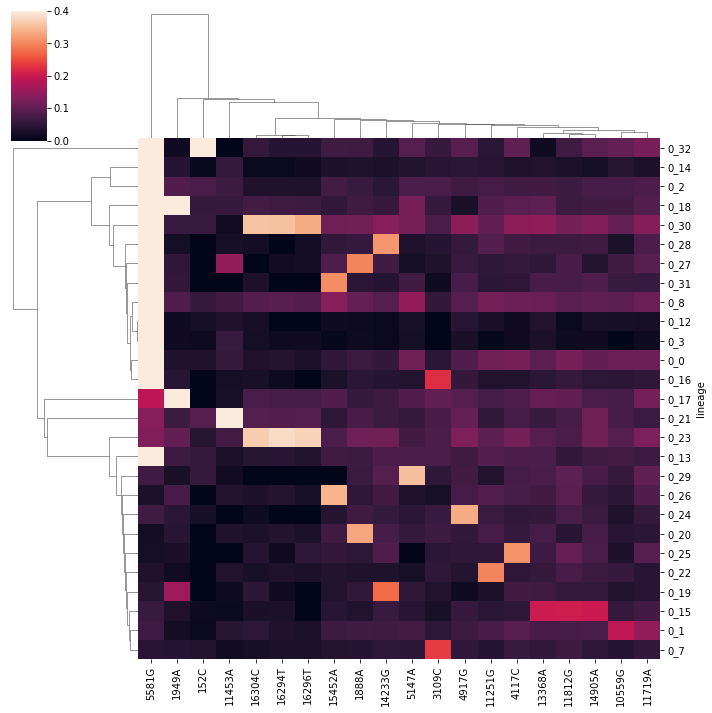

In [20]:
sns.clustermap(np.sqrt(mean_af), row_linkage=link, vmax=0.4)

In [21]:
tmp_den = dc.dendro_cluster(mean_af, g, d_thresh=0.6)
tmp_den

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [115.0, 115.0, 125.0, 125.0],
  [92.5, 92.5, 120.0, 120.0],
  [75.0, 75.0, 106.25, 106.25],
  [65.0, 65.0, 90.625, 90.625],
  [55.0, 55.0, 77.8125, 77.8125],
  [45.0, 45.0, 66.40625, 66.40625],
  [35.0, 35.0, 55.703125, 55.703125],
  [20.0, 20.0, 45.3515625, 45.3515625],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [235.0, 235.0, 252.5, 252.5],
  [225.0, 225.0, 243.75, 243.75],
  [215.0, 215.0, 234.375, 234.375],
  [205.0, 205.0, 224.6875, 224.6875],
  [195.0, 195.0, 214.84375, 214.84375],
  [185.0, 185.0, 204.921875, 204.921875],
  [175.0, 175.0, 194.9609375, 194.9609375],
  [165.0, 165.0, 184.98046875, 184.98046875],
  [155.0, 155.0, 174.990234375, 174.990234375],
  [145.0, 145.0, 164.9951171875, 164.9951171875],
  [135.0, 135.0, 154.99755859375, 154.99755859375],
  [32.67578125, 32.67578125, 144.998779296875, 144.998779296875],
  [5.0, 5.0, 88.8372802734375, 88.83

In [22]:
curr_clones

,size,donor
lineage,,
0_32,47,0
0_14,177,0
0_2,322,0
0_18,139,0
0_30,81,0
0_28,89,0
0_27,91,0
0_31,59,0
0_8,286,0


In [23]:
%matplotlib inline
if not (mean_af.shape[0] == 1 or  mean_af.shape[1] == 1 ):

    den = dc.dendro_cluster(mean_af, g, d_thresh=0.6)

    clusters, link = run_dynamic(mean_af, metric='euclidean', method="average", minClusterSize=1)
    
    curr_clones["den_clust"] = curr_clones.apply(lambda x: f'C{clusters.loc[x.name, "labels"]}', axis=1)
    
#     if verbose:
#         print('icoord and color list')
#         print(len(den["icoord"]))
#         print(len(den["color_list"]))
#         print('leaves leaves color and mean_af shape')
#         print(len(den["leaves"]))
#         print(len(den["leaves_color_list"]))
#         print(mean_af.shape)

#     # cluster_classes = dc.get_cluster_classes(den)
#     curr_clones = dc.add_cluster_labels(den,curr_clones)
#     curr_clones

    size_pvals = dc.cluster_stats(curr_clones, out_f= out_f )

    curr_clones["donor"]= [x.split("_")[0] for x in curr_clones.index]
    curr_clones = curr_clones.loc[mean_af.index]

    # with open(out_f + ".dendrogram_pvals.txt", "w") as f:
    #     #for l in size_pvals:
    #     f.write("\n".join(size_pvals))

    curr_clones


distances
[0.91821 0.07557 0.74270 0.26544 0.92015 0.06250 1.20592 0.23426 0.92413
 0.51630 0.92798 1.21429 0.92444 0.93731 0.92418 0.92555 0.92876 0.09370
 0.10023 0.92484 0.07783 0.21238 0.09915 0.89508 0.92226 0.05166 0.98564
 0.17898 0.65569 0.07081 0.94446 0.81784 0.83231 0.08593 0.40349 0.11074
 0.81279 0.09232 0.24373 0.11507 0.09543 0.12009 0.94135 0.93870 0.12505
 0.98774 0.92270 0.95356 1.27526 0.06736 0.96363 0.80952 0.33036 0.98784
 0.06615 1.25680 0.27380 0.99066 0.58304 0.99459 1.26613 0.99191 1.00302
 0.99096 0.99339 0.99533 0.10442 0.11181 0.99277 0.00366 0.23458 0.10049
 0.89925 0.98880 0.05008 0.47925 0.18704 0.76843 0.82611 0.66206 0.19274
 0.22673 0.20737 0.82866 0.19695 0.29151 0.20611 0.20091 0.21223 0.76646
 0.76348 0.21236 0.81161 0.75283 0.77846 1.15463 0.18523 0.78799 0.65867
 0.29215 1.02744 0.25539 0.66182 0.25292 0.66704 1.03330 0.66342 0.68744
 0.66367 0.66528 0.66837 0.29672 0.29569 0.66624 0.33242 0.32637 0.30864
 0.93118 0.65911 0.31140 0.94671 0.81845 

In [24]:
curr_clones

,size,donor,den_clust
lineage,,,
0_0,805,0,C2
0_1,412,0,C1
0_12,237,0,C2
0_13,225,0,C1
0_14,177,0,C2
0_15,184,0,C1
0_16,178,0,C2
0_17,150,0,C1
0_18,139,0,C2


## Group clones using dendrogram and run stats on size differences in the groups

### Run ranksums on clone size btwn debdrogram clusters

In [25]:
# size_pvals = []
# for pair in combinations(curr_clones["den_clust"].unique(),2):
#     print(pair)
#     stat, p_val = scipy.stats.ranksums(curr_clones.loc[curr_clones["den_clust"]==pair[0], "size"].values, 
#                          y=curr_clones.loc[curr_clones["den_clust"]==pair[1], "size"].values, 
#                          alternative='two-sided')

#     size_pvals.append(f"{pair[0]}, {pair[1]}, {str(p_val)}")
    


## Plot with dendro clusters

In [26]:
conditions = cells_meta["condition"].unique()

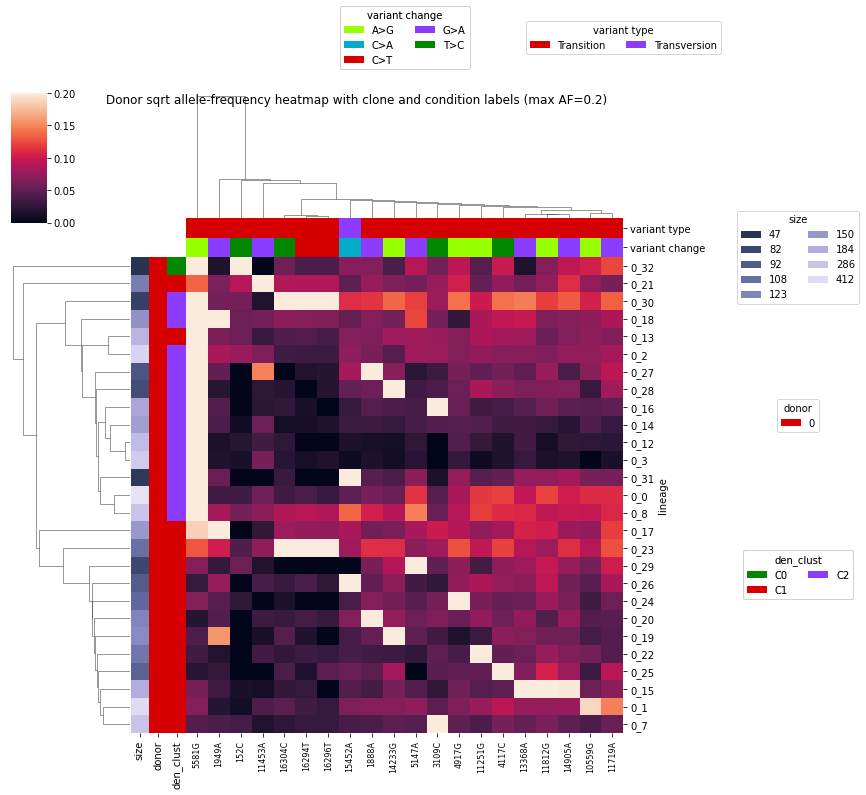

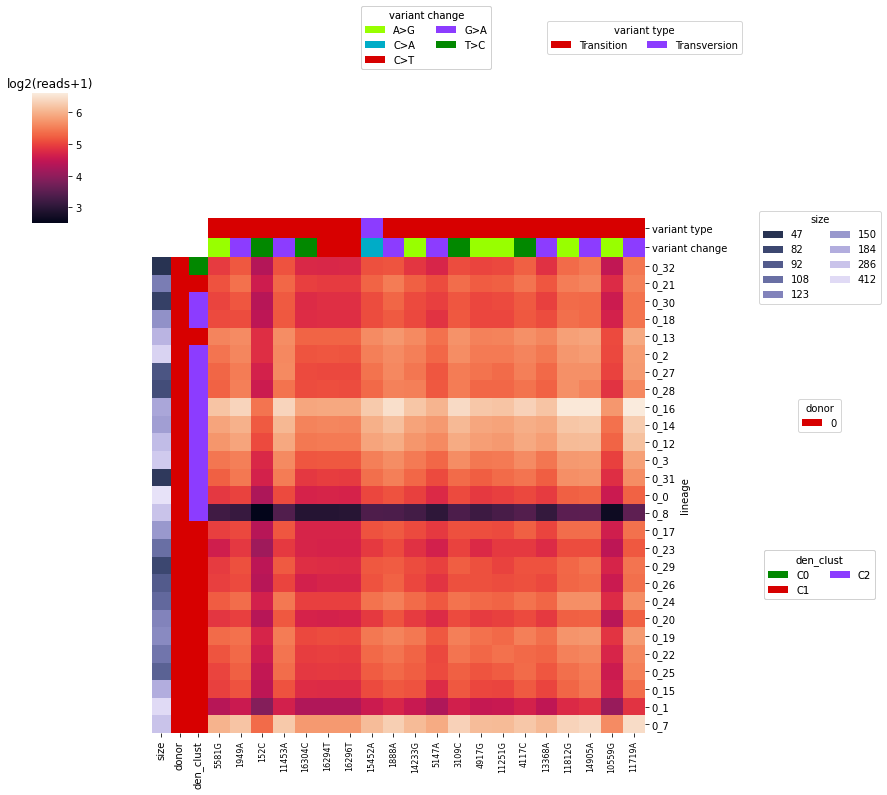

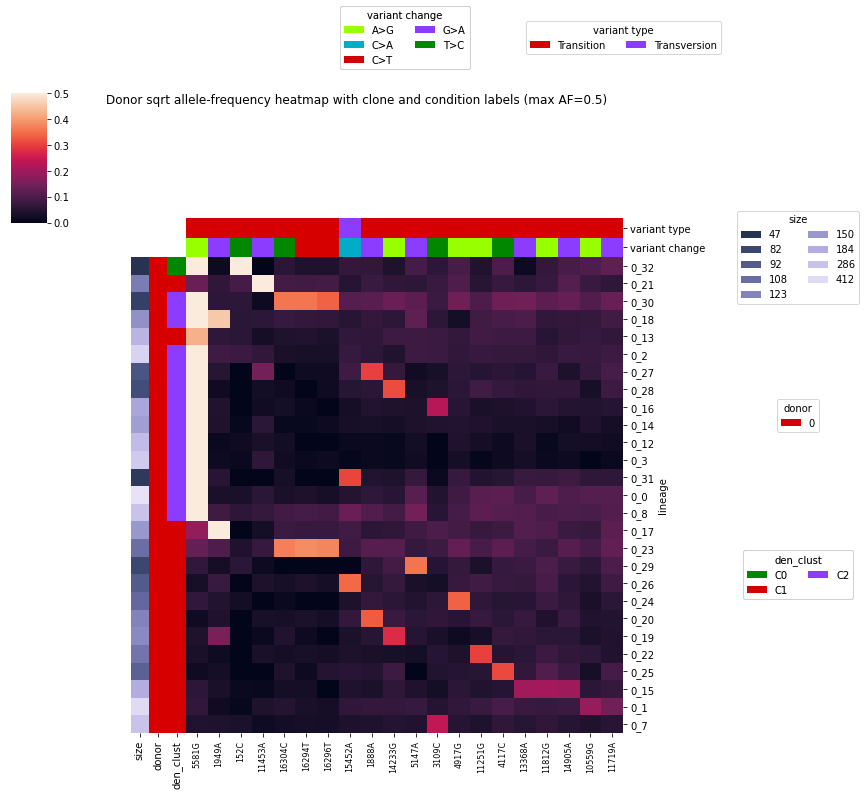

In [27]:
if not (mean_af.shape[0] == 1 or  mean_af.shape[1] == 1 ):
    g = ch.plot_cluster(np.sqrt(mean_af),row_meta=curr_clones, to_row_clust=True, to_col_clust=True,
                        col_meta=variants_df[["variant type", "variant change"]], col_clr_schemes="categorical",
                        row_clr_schemes={"size":"sequential","donor":"categorical","den_clust":"categorical"}, 
                        vmax=0.2, vmin=0)
    plt.suptitle("Donor sqrt allele-frequency heatmap with clone and condition labels (max AF=0.2)")
    #fu.helper_save(out_f+"withEnrichmentFoldChange.NoCondition.clust.max2.AF.png",to_pdf=False)
    fu.helper_save(out_f+".dendro.NoCondition.max2.AF.png",to_pdf=False)

    inds = g.dendrogram_row.dendrogram["leaves"]
    cols = g.dendrogram_col.dendrogram["leaves"]

    g1d = ch.plot_cluster(mean_dp.iloc[inds, cols], row_meta=curr_clones, to_row_clust=False, to_col_clust=False,
                          row_clr_schemes={"size":"sequential","donor":"categorical","den_clust":"categorical"}, 
                          col_meta=variants_df[["variant type", "variant change"]], col_clr_schemes="categorical",
                         )
    g1d.ax_cbar.set_title("log2(reads+1)")
    fu.helper_save(out_f+".dendro.NoCondition.DP.png")#, f=g1d.figure)


    mean_af = mean_af.iloc[inds,cols]
    curr_clones = curr_clones.loc[mean_af.index]

    ch.plot_cluster(np.sqrt(mean_af),row_meta=curr_clones, to_row_clust=False, to_col_clust=False,
                    col_meta=variants_df[["variant type", "variant change"]], col_clr_schemes="categorical",
                    row_clr_schemes={"size":"sequential","donor":"categorical","den_clust":"categorical"}, 
                    vmax=0.5, vmin=0)
    plt.suptitle("Donor sqrt allele-frequency heatmap with clone and condition labels (max AF=0.5)")
    #fu.helper_save(out_f+"withEnrichmentFoldChange.NoCondition.clust.max5.AF.png",to_pdf=False)
    fu.helper_save(out_f+".dendro.NoCondition.max5.AF.png",to_pdf=False)



In [28]:
out_f

'/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/clones/variants_init/knn/kparam_30/barcodes/btwnClones_dendro_dynamic/donor0'

### Save mean_af and curr_clonnes

In [29]:

mean_af.to_csv(out_f+".mean.csv")
curr_clones.to_csv(out_f+".clones_dendro.csv")

In [30]:
out_f

'/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/clones/variants_init/knn/kparam_30/barcodes/btwnClones_dendro_dynamic/donor0'